<a href="https://colab.research.google.com/github/yerinsally/2022_PythonML/blob/main/12_2_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 불러오기와 데이터셋 나누기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/drive/My Drive/g_ml/Fvote.csv', encoding='utf-8')

In [ ]:
X=data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
        'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 
        'age', 'score_gov', 'score_progress', 'score_intention']]

In [ ]:
y=data[['vote']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42 )

# 2. Grid Search 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid=[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, 
            {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [ ]:
from sklearn.svm import SVC

In [ ]:
grid_search=GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.696


In [ ]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.755


In [ ]:
result_grid= pd.DataFrame(grid_search.cv_results_)

In [ ]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003670,0.000755,0.001322,0.000219,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.6875,0.6875,0.68750,0.709677,0.709677,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
1,0.003171,0.000482,0.001388,0.000591,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.6875,0.6875,0.68750,0.709677,0.709677,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
2,0.002834,0.000098,0.001077,0.000069,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.6875,0.6875,0.68750,0.709677,0.709677,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
3,0.002747,0.000014,0.001064,0.000024,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.6875,0.6875,0.68750,0.709677,0.709677,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
4,0.002868,0.000101,0.001084,0.000040,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.6875,0.6875,0.68750,0.709677,0.709677,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.004452,0.000678,0.001102,0.000031,100,0.01,linear,"{'C': 100, 'gamma': 0.01, 'kernel': 'linear'}",0.6875,0.6875,0.65625,0.709677,0.709677,0.690121,0.019626,50,0.698413,0.698413,0.706349,0.692913,0.692913,0.697800,0.004931
68,0.004486,0.000683,0.001174,0.000073,100,0.1,linear,"{'C': 100, 'gamma': 0.1, 'kernel': 'linear'}",0.6875,0.6875,0.65625,0.709677,0.709677,0.690121,0.019626,50,0.698413,0.698413,0.706349,0.692913,0.692913,0.697800,0.004931
69,0.004433,0.000571,0.001296,0.000267,100,1,linear,"{'C': 100, 'gamma': 1, 'kernel': 'linear'}",0.6875,0.6875,0.65625,0.709677,0.709677,0.690121,0.019626,50,0.698413,0.698413,0.706349,0.692913,0.692913,0.697800,0.004931
70,0.004430,0.000564,0.001180,0.000132,100,10,linear,"{'C': 100, 'gamma': 10, 'kernel': 'linear'}",0.6875,0.6875,0.65625,0.709677,0.709677,0.690121,0.019626,50,0.698413,0.698413,0.706349,0.692913,0.692913,0.697800,0.004931


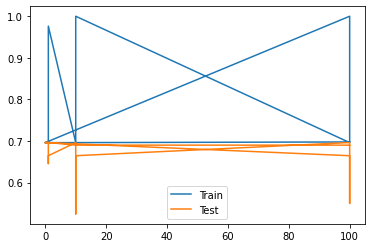

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label="Test")
plt.legend()

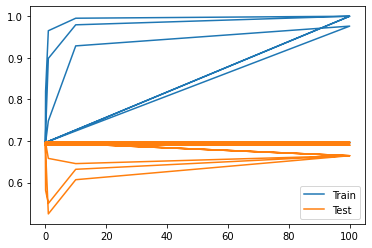

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_gamma'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_gamma'], result_grid['mean_test_score'], label="Test")
plt.legend()

# 3. Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import randint

In [ ]:
param_distribs={'kernel': ['rbf'], 'C': randint(low=0.001, high=100), 
                'gamma': randint(low=0.001, high=100)}

In [ ]:
from sklearn.svm import SVC

In [ ]:
random_search=RandomizedSearchCV(SVC(), param_distributions=param_distribs, cv=5, return_train_score=True)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4d5d22dc18>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4d5c95b668>,
                                        'kernel': ['rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring=None, verbose=0)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'C': 15, 'gamma': 85, 'kernel': 'rbf'}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.665


In [ ]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.755


In [ ]:
result_random = random_search.cv_results_

In [ ]:
result_random = pd.DataFrame(result_random)

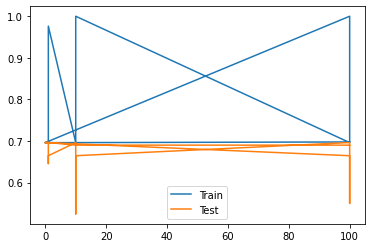

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label="Test")
plt.legend()

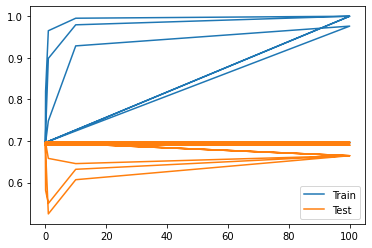

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_gamma'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_gamma'], result_grid['mean_test_score'], label="Test")
plt.legend()

# 4. 모델평가

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc1=SVC(C=80, gamma=71, kernel='rbf')

In [ ]:
svc1.fit(X_train, y_train)

SVC(C=80, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=71, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pred_train=svc1.predict(X_train)

In [ ]:
confusion_train=confusion_matrix(y_train, pred_train)

In [ ]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[ 48   0]
 [  0 110]]


In [ ]:
pred_test=svc1.predict(X_test)

In [ ]:
confusion_test=confusion_matrix(y_test, pred_test)

In [ ]:
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[ 0 13]
 [ 0 40]]


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1=f1_score(y_test, pred_test)

In [ ]:
print("f1 score:\n", f1)

f1 score:
 0.8602150537634409


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cfreport=classification_report(y_test, pred_test)

In [ ]:
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.75      1.00      0.86        40

    accuracy                           0.75        53
   macro avg       0.38      0.50      0.43        53
weighted avg       0.57      0.75      0.65        53



# 5. 다중분류의 적용

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/drive/My Drive/g_ml/Fvote.csv', encoding='utf-8')

In [ ]:
X=data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
        'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 
        'age', 'score_gov', 'score_progress', 'score_intention']]

In [ ]:
y=data[['parties']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42 )

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid=[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, 
            {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [ ]:
from sklearn.svm import SVC

In [ ]:
grid_search=GridSearchCV(SVC(), param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.571


In [ ]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.509


In [ ]:
svc2=SVC(C=10, gamma=0.001, kernel='linear')

In [ ]:
svc2.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pred_train=svc2.predict(X_train)

In [ ]:
confusion_train=confusion_matrix(y_train, pred_train)

In [ ]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[23  2  3  9]
 [ 3 25  1  8]
 [ 2  1  6 10]
 [ 7  4  2 52]]


In [ ]:
pred_test=svc2.predict(X_test)

In [ ]:
confusion_test=confusion_matrix(y_test, pred_test)

In [ ]:
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[ 5  2  1  5]
 [ 2  8  1  5]
 [ 2  0  1  3]
 [ 3  2  0 13]]


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1=f1_score(y_test, pred_test, average="micro" )

In [ ]:
print("micro f1 score:\n", f1)

micro f1 score:
 0.5094339622641509


In [ ]:
f2=f1_score(y_test, pred_test, average="macro" )

In [ ]:
print("macro f1 score:\n", f2)

macro f1 score:
 0.44613997113997117


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cfreport=classification_report(y_test, pred_test)

In [ ]:
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           1       0.42      0.38      0.40        13
           2       0.67      0.50      0.57        16
           3       0.33      0.17      0.22         6
           4       0.50      0.72      0.59        18

    accuracy                           0.51        53
   macro avg       0.48      0.44      0.45        53
weighted avg       0.51      0.51      0.50        53

